# Hypothesis 1: Credibility and Trustworthiness

**Hypothesis:** LLM-generated content will be perceived as less credible and trustworthy than human-written content.

This notebook's goal is to analyize the data in regards to the first hypothesis by comparing the average scores of trustworthiness and credibility of the two content groups. 

### Load preprocessed data

To start, we'll import all relevant libraries needed to test this hypothesis and load the data.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

from data_preprocessing import load_and_preprocess

# Load and preprocess data
df = load_and_preprocess('data/cleaned_file.csv')

### Create average scores per content type

In [4]:
# Calculate mean credibility and trustworthiness per participant (across all 6 examples)
df['credibility'] = df[[
    'credibility01', 'credibility02', 'credibility03',
    'credibility04', 'credibility05', 'credibility06']].mean(axis=1)

df['trustworthiness'] = df[[
    'trustworthiness01', 'trustworthiness02', 'trustworthiness03',
    'trustworthiness04', 'trustworthiness05', 'trustworthiness06']].mean(axis=1)

### Compare Groups (LLM VS. Human)

The groups will be compared using the ttest_ind function from the scipy.stats library. 

In [5]:
# T-tests for credibility and trustworthiness
cred_llm = df[df['content_type'] == 'AI']['credibility']
cred_human = df[df['content_type'] == 'Human']['credibility']

trust_llm = df[df['content_type'] == 'AI']['trustworthiness']
trust_human = df[df['content_type'] == 'Human']['trustworthiness']

In [6]:
cred_ttest = ttest_ind(cred_llm, cred_human)
trust_ttest = ttest_ind(trust_llm, trust_human)

print("Credibility T-Test:", cred_ttest)
print("Trustworthiness T-Test:", trust_ttest)

Credibility T-Test: Ttest_indResult(statistic=0.6535999651608542, pvalue=0.5161431947194153)
Trustworthiness T-Test: Ttest_indResult(statistic=0.19720992675266805, pvalue=0.8444036904429286)


### Visualization of the results

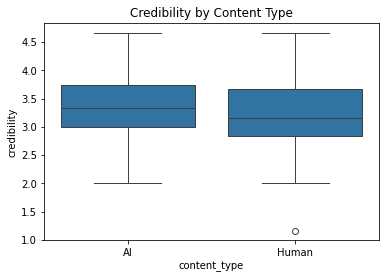

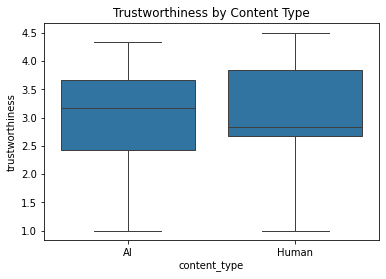

In [7]:
# Boxplots for visualization
sns.boxplot(x='content_type', y='credibility', data=df)
plt.title('Credibility by Content Type')
plt.show()

sns.boxplot(x='content_type', y='trustworthiness', data=df)
plt.title('Trustworthiness by Content Type')
plt.show()

### Conclusion

No significant difference was found. Participants rated both LLM- and human-written texts similarly in terms of credibility and trustworthiness (p > 0.05).